In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import os
import utilsCM

In [2]:
# Load Word2Vec
filename = 'ThingsWrd2Vec_subset.txt'
filepath = '../../../data-10/'
Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)

In [3]:
pca_W2Vec = PCA(n_components=125)
pca_W2Vec.fit(Wrd2Vec)

PCA(copy=True, iterated_power='auto', n_components=125, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
pathtofile = '../../../data-07/'
W2S_subset = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)

In [5]:
pca_W2S = PCA(n_components=125)
pca_W2S.fit(W2S_subset)


PCA(copy=True, iterated_power='auto', n_components=125, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
from pandas import DataFrame as pddf

pca_ratio = {}
pca_ratio['W2Sense']= []
pca_ratio['W2Vec']= []
pca_ratio['W2Sense']= pca_W2S.explained_variance_ratio_
pca_ratio['W2Vec']= pca_W2Vec.explained_variance_ratio_
pca_ratio_pd = pddf.from_dict(pca_ratio)


In [7]:
import seaborn as sns
sns.lineplot(data= pca_ratio_pd)

In [8]:
import numpy as np
Y_embeddings_subset = Wrd2Vec.values[:,:].astype(np.float)
Y_embeddings_subset

array([[ 0.01977539, -0.02392578,  0.07324219, ...,  0.13671875,
        -0.18359375, -0.09619141],
       [ 0.13378906,  0.08984375, -0.16308594, ...,  0.12207031,
        -0.30859375,  0.21484375],
       [-0.03515625,  0.15234375, -0.12402344, ..., -0.04956055,
        -0.1640625 , -0.03222656],
       ...,
       [-0.17578125, -0.109375  , -0.18945312, ..., -0.0378418 ,
         0.30859375,  0.05004883],
       [-0.03833008, -0.27734375, -0.18652344, ..., -0.02502441,
        -0.11962891,  0.15429688],
       [-0.26953125, -0.00576782, -0.28125   , ...,  0.12451172,
         0.09472656, -0.02966309]])

In [9]:
layer =  {'conv_1','conv_5','fc_3'}

Sub = [1,2,3,4]


pretrained_val = True

datapath = '../../../data-00/'
savepath = '../../../data-11/'


In [10]:
WIpath = '../../../data-04/'
nsample = 12
WrdThingsInfo = pd.read_csv(WIpath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)

In [ ]:


ROI = {'EVC','ObjectROI'}
# ROI = {'EVC'}
keyword = {'DNNActvtn','ROIpred'}
# keyword = {'ROIpred'}
Keepncomps = list(range(2,42,2))
# Keepncomps = [2]
pretrained_val = True

Ypredict = 'Word2Vec'

for ikeyword in keyword:
    for ilayer in layer:
        
        if ikeyword is 'ROIpred':
            
            for iROI in ROI: 
                predictor_variable = {}
                for iSub in Sub:
                    Subfile = datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer 
                    if not pretrained_val:
                        Subfile = Subfile + '_untrained'
                    
                    thisSub = np.load(Subfile + '.npy')
                            
                    #load ROIpred as predictor variable
                    if iSub is 1:
                        predictor_variable = thisSub
                    else:
                        predictor_variable = np.append( predictor_variable , thisSub, axis = 1)
                    
                predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]
                    

                for icomps in Keepncomps:
                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'

                    if not pretrained_val:
                        filename = filename+'_untrained'
                        
                    if not os.path.isfile(savepath + filename + '.npy'):
                        mean_r = utilsCM.iter_cvregress(predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,icomps,iROI,savefolder = savepath, Ypredict=Ypredict,pretrained = pretrained_val)
#                     utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps,iROI, figurepath = 'figures-05/')
#                     print(mean_r)
        
        
        elif ikeyword is 'DNNActvtn':
            predictor_variable_file = datapath +  "things_" + ilayer 
            if not pretrained_val:
                predictor_variable_file = predictor_variable_file + '_untrained'
            
            predictor_variable = pd.read_csv(predictor_variable_file + '.csv', header=None, index_col=0).iloc[:,:].to_numpy()            
            predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]

            for icomps in Keepncomps:
                filename = 'Predict' + Ypredict + '_'  + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                
                if not pretrained_val:
                    filename = filename +'_untrained'
                                            
                if not os.path.isfile(savepath + filename + '.npy'):
                    mean_r = utilsCM.iter_cvregress(predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,icomps,savefolder = savepath, Ypredict=Ypredict, pretrained = pretrained_val)
                
#                 utilsCM.make_figure(mean_r,ikeyword,ilayer,icomps, figurepath = 'figures-05/')

In [13]:
tresh_bonf = utilsCM.p2r(.05/Y_embeddings_subset.shape[1], Y_embeddings_subset.shape[0])
figurepath='../../../figures-11/'

ROI = {'EVC','ObjectROI'}
keyword = {'DNNActvtn','ROIpred'}
Keepncomps = list(range(2,42,2))
pretrained_val = True

In [14]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

savepath = '../../../data-11/'
figurepath = '../../../figures-11/'
layer = {'fc_3'}
pretrained_vec = [True, False]
##Showing histograms for senses above threshold

Ypredict = 'Word2Vec'

myDict_count = {}
myDict_mean = {}
myDict_max = {}
myDict_median = {}


for ilayer in layer:
    for pretrained_val in pretrained_vec:
        for ikeyword in keyword:            
            for icomps in Keepncomps:
                thisPrediction = []
                
                if ikeyword is 'DNNActvtn':

                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                    DictKey = ikeyword

                    if not pretrained_val:
                        filename = filename + '_untrained'
                        DictKey = DictKey + '_untrained'
        
                    if DictKey not in myDict_count:
                        myDict_count[DictKey] = []
                        myDict_mean[DictKey] = []
                        myDict_max[DictKey] = []
                        myDict_median[DictKey] = []
                        
                    thisPrediction = np.load(savepath + filename + '.npy')
                    pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                    myDict_count[DictKey].append(pred_thresh.shape[0])
                    myDict_mean[DictKey].append(pred_thresh.mean())
                    myDict_max[DictKey].append(pred_thresh.max())
                    myDict_median[DictKey].append(np.median(pred_thresh))
                    utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,figure_size=(50,20),figure_path = figurepath, Ypredict=Ypredict,font_size=40,pretrained = pretrained_val)
                    
            
                elif ikeyword is 'ROIpred':
                
                    for iROI in ROI:
                        filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                        DictKey = iROI
                        if not pretrained_val:
                            filename = filename +'_untrained'
                            DictKey = DictKey + '_untrained'

                        if DictKey not in myDict_count:
                            myDict_count[DictKey] = []
                            myDict_mean[DictKey] = []
                            myDict_max[DictKey] = []
                            myDict_median[DictKey] = []
                        
                        thisPrediction = np.load(savepath + filename + '.npy')
                        pred_thresh = thisPrediction[thisPrediction>tresh_bonf]
                        myDict_count[DictKey].append(pred_thresh.shape[0])
                        myDict_mean[DictKey].append(pred_thresh.mean())
                        myDict_max[DictKey].append(pred_thresh.max())
                        myDict_median[DictKey].append(np.median(pred_thresh))
                        utilsCM.make_figure(pred_thresh,ikeyword,ilayer,icomps,iROI,figure_size=(50,20),figure_path = figurepath, Ypredict=Ypredict,font_size=40,pretrained = pretrained_val)
                        
                        
        
    myDict_count['PCs'] = []
    myDict_mean['PCs'] = []
    myDict_max['PCs'] = []
    myDict_median['PCs'] = []
    myDict_count['Metric'] = []
    myDict_mean['Metric'] = []
    myDict_max['Metric'] = []
    myDict_median['Metric'] = []
    for i in range(2,42,2):
        myDict_count['PCs'].append(i)
        myDict_mean['PCs'].append(i)
        myDict_max['PCs'].append(i)
        myDict_median['PCs'].append(i)
        myDict_count['Metric'].append('count')
        myDict_mean['Metric'].append('mean')
        myDict_max['Metric'].append('max')
        myDict_median['Metric'].append('median')

In [15]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [16]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

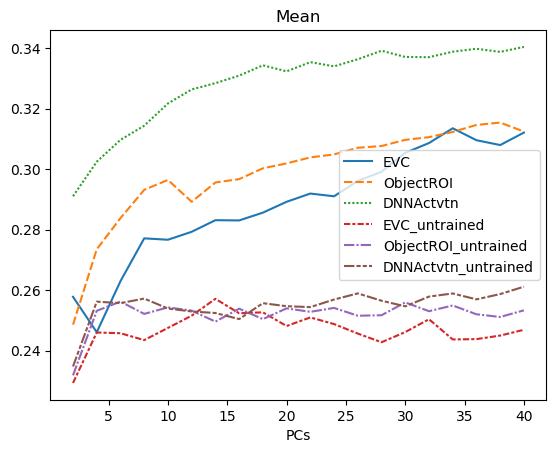

In [17]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:6]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

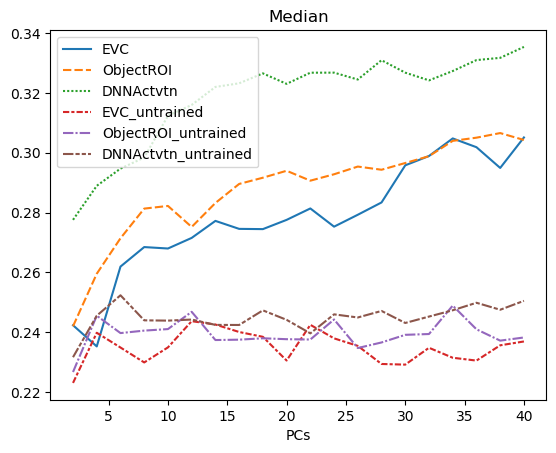

In [18]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:6]).set_title('Median')
plt.savefig(figurepath + "Median.png")

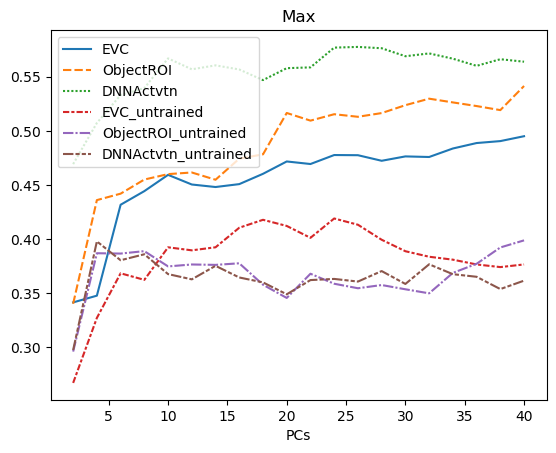

In [19]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:6]).set_title('Max')
plt.savefig(figurepath + "Max.png")

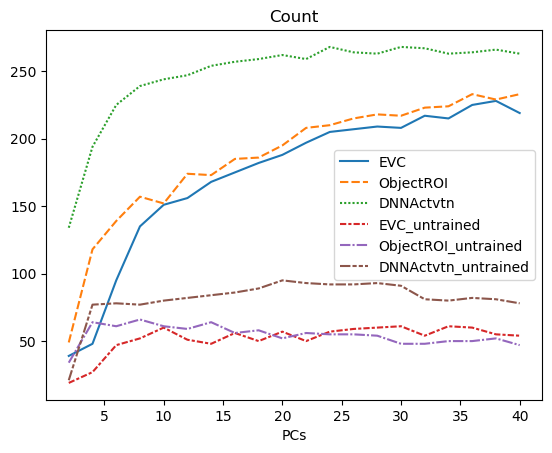

In [21]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:6]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [ ]:
for ikeyword in keyword:
    for ilayer in layer:
        
        if ikeyword is 'ROIpred':
            
            for iROI in ROI: 
                predictor_variable = {}
                for iSub in Sub:
                    Subfile = datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer 
                    if not pretrained_val:
                        Subfile = Subfile + '_untrained'
                    
                    thisSub = np.load(Subfile + '.npy')
                            
                    #load ROIpred as predictor variable
                    if iSub is 1:
                        predictor_variable = thisSub
                    else:
                        predictor_variable = np.append( predictor_variable , thisSub, axis = 1)
                    
                predictor_variable_sub = predictor_variable[WrdThingsInfo['old_index']]
                pca_ROI = PCA(n_components=60)
                pca_ROI.fit(predictor_variable_sub)
                    